# importing Libraries

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder , OrdinalEncoder , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Reading Data 

In [185]:
dataset=pd.read_csv(r"C:\Users\Administrator\Desktop\Machine Learning project-MaktabKhooneh\houseprice.csv")
dataset.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [186]:
dataset.tail()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67
3478,82,2,False,True,True,Parand,3.600000e+08,12000.00


In [187]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


# EDA

In [188]:
dataset.describe().T 

,count,mean,std,min,25%,50%,75%,max
Room,3479.0,2.079908e+00,7.582753e-01,0.0,2.000000e+00,2.000000e+00,2.000000e+00,5.000000e+00
Price,3479.0,5.359023e+09,8.099935e+09,3600000.0,1.418250e+09,2.900000e+09,6.000000e+09,9.240000e+10
Price(USD),3479.0,1.786341e+05,2.699978e+05,120.0,4.727500e+04,9.666667e+04,2.000000e+05,3.080000e+06


In [189]:
dataset.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [190]:
dataset.duplicated().sum()

208

In [191]:
for col in dataset[['Room', 'Parking', 'Warehouse', 'Elevator']]:
    print(dataset[col].value_counts())
    print("-------------------------")

Room
2    1961
3     732
1     673
4      70
5      33
0      10
Name: count, dtype: int64
-------------------------
Parking
True     2950
False     529
Name: count, dtype: int64
-------------------------
Warehouse
True     3182
False     297
Name: count, dtype: int64
-------------------------
Elevator
True     2739
False     740
Name: count, dtype: int64
-------------------------


## Handling Missing Value & Outlier

In [192]:
dataset["Area"]=dataset["Area"].str.replace(',' , '').str.strip().astype(np.int64)

In [193]:
#handling outlier
msk = dataset["Area"] > 3000
dataset = dataset[~msk]

In [194]:
dataset.drop_duplicates(inplace=True)

## Visualization Data

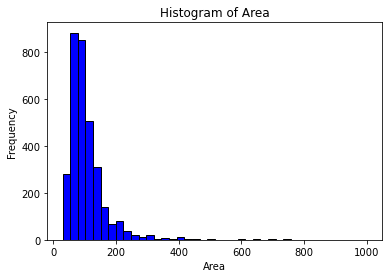

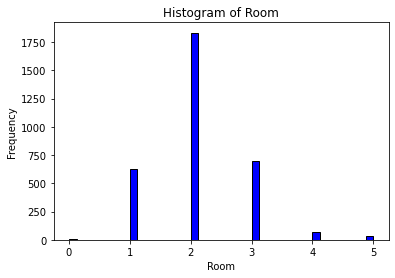

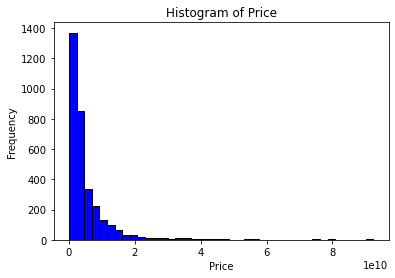

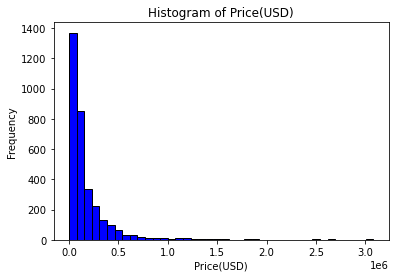

In [195]:
import matplotlib.pyplot as plt

for col in dataset.columns:
    if dataset[col].dtype == 'int64' or dataset[col].dtype == 'float':
        plt.hist(dataset[col], bins=40, edgecolor='black', color="blue" )
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.title(f'Histogram of {col}')
        plt.show()


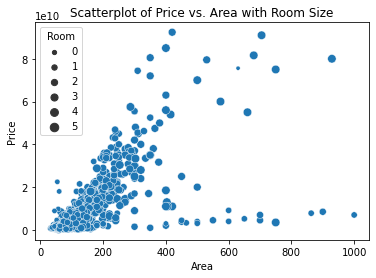

In [196]:
sns.scatterplot(x="Area", y="Price", size="Room", data=dataset)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Scatterplot of Price vs. Area with Room Size")
plt.show()

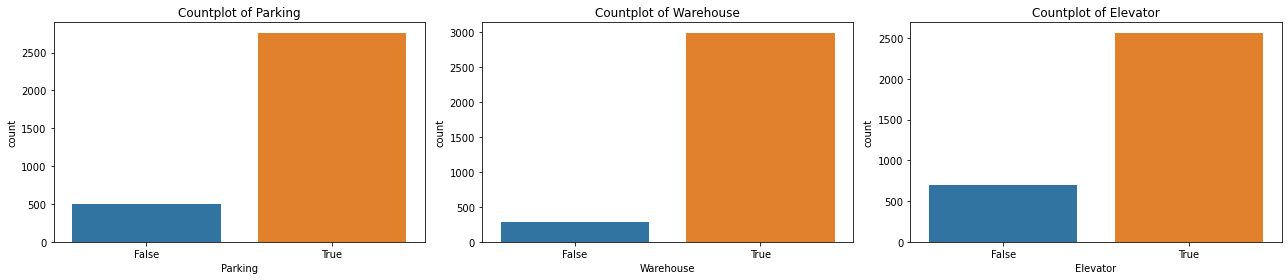

In [197]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
boolean_columns = [col for col in dataset.columns if dataset[col].dtype == 'bool']

for i, col in enumerate(boolean_columns):
        sns.countplot(x=col, data=dataset, ax=axes[i])
        axes[i].set_title(f'Countplot of {col}')

plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='Price'>

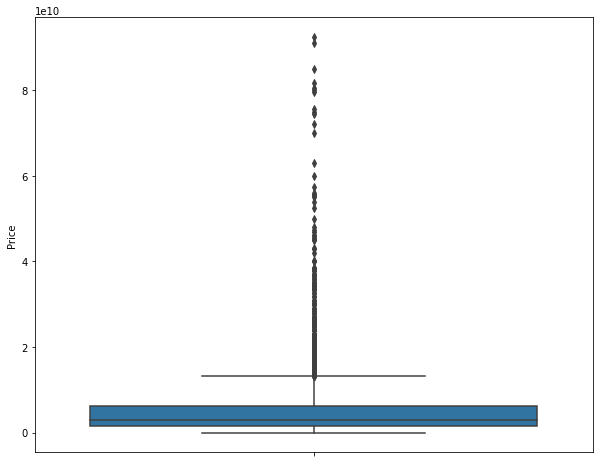

In [198]:
plt.figure(figsize=(10 , 8))
sns.boxplot(y="Price" , data=dataset)

## Train Test Split 

In [199]:
Y=dataset["Price"]
X=dataset.drop(["Price"] , axis=1)

In [200]:
x_train , x_test , y_train ,y_test=train_test_split(X , Y , test_size=0.2  , random_state=42)

In [201]:
num_col=["Area"]
cat_col_1hot=list(x_train[[ "Parking" , "Warehouse" , "Elevator" , "Address"]])
cat_col_ord=["Room"]
full_pipeline=ColumnTransformer([
    ("norm" , MinMaxScaler() ,num_col ) , 
    ("1hot" , OneHotEncoder() ,cat_col_1hot ),
    ("ordinal" , OrdinalEncoder() , cat_col_ord)
])
combined_data = pd.concat([x_train, x_test], axis=0)
combined_data_preprocessed = full_pipeline.fit_transform(combined_data)
x_train_preprocessed = combined_data_preprocessed[:len(x_train)]
x_train_preprocessed_dense=x_train_preprocessed.toarray()
x_test_preprocessed = combined_data_preprocessed[len(x_train):]
x_test_preprocessed_dense=x_test_preprocessed.toarray()


# Model Selection

In [202]:
las=Lasso(alpha=0.1)
las.fit(x_train_preprocessed_dense, y_train)
y_pred_train = cross_val_predict(las, x_train_preprocessed_dense, y_train, cv=5) 
model_mse = mean_squared_error(y_train, y_pred)
model_rmse = np.sqrt(model_mse)
R2 = r2_score(y_train, y_pred)
print(f"Model: {las.__class__.__name__}")
print(f"RMSE: {model_rmse}")
print(f"R2 Score: {R2}")

Model: Lasso
RMSE: 4934737116.9943
R2 Score: 0.6301499218136959


Text(0.5, 1.0, 'Scatterplot of Actual vs. Predicted Values')

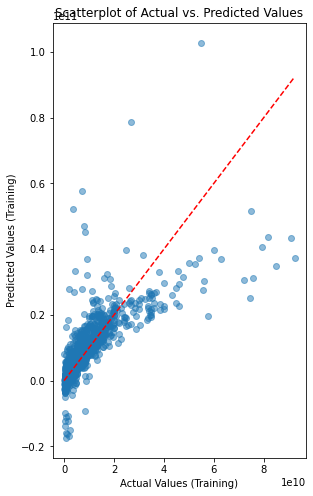

In [203]:
plt.figure(figsize=(10 , 8))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5 )
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red')
plt.xlabel("Actual Values (Training)")
plt.ylabel("Predicted Values (Training)")
plt.title("Scatterplot of Actual vs. Predicted Values")

# Evaluation

In [204]:
y_pred_test=las.predict(x_test_preprocessed_dense)

Text(0.5, 1.0, 'Scatterplot of Actual vs. Predicted Values')

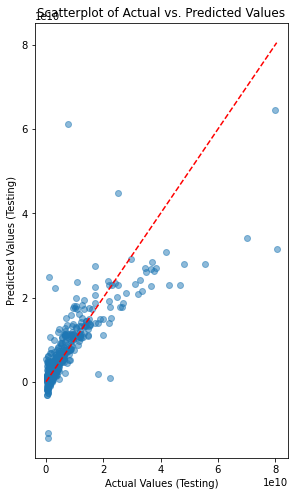

In [205]:
plt.figure(figsize=(10 , 8))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("Actual Values (Testing)")
plt.ylabel("Predicted Values (Testing)")
plt.title("Scatterplot of Actual vs. Predicted Values")

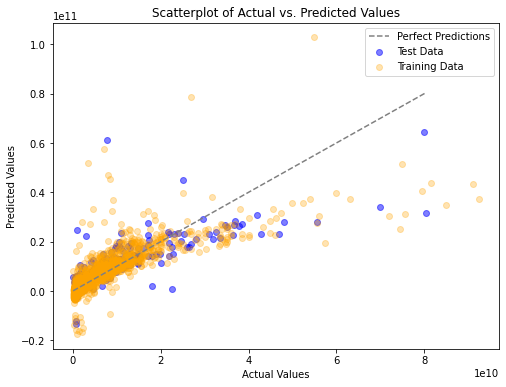

In [220]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, label='Test Data', color='blue', alpha=0.5)
plt.scatter(y_train, y_pred_train, label='Training Data', color='orange', alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Perfect Predictions')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatterplot of Actual vs. Predicted Values')
plt.legend()
plt.show()